In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from datetime import date
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

rcParams['figure.figsize'] = (18, 12)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True

COLORS = ['#99d594', '#D53E4F', '#FC8D59']

In [ ]:
df = pd.read_csv('marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
130,130,8026,1952,S1,Menikah,62998000.0,0,1,30-09-2013,10,...,5,0,0,0,0,0,0,3,11,0
1294,1294,2811,1963,S3,Lajang,48918000.0,1,1,12-04-2014,21,...,4,0,0,0,0,0,0,3,11,0
538,538,11096,1952,D3,Bertunangan,57247000.0,0,1,08-08-2013,50,...,2,0,0,0,0,0,0,3,11,0
1018,1018,3158,1973,S1,Menikah,32300000.0,1,0,03-01-2013,1,...,8,0,0,0,0,0,0,3,11,0
1754,1754,2154,1971,S1,Janda,30372000.0,1,1,25-12-2012,33,...,7,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

def getYear(s):
  return s.split("-")[2]

df['Member_Year']= df['Dt_Customer'].apply(lambda x: getYear(x))

df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='ID', inplace=True)
df.drop(columns='Dt_Customer', inplace=True)

In [ ]:
categorical = [
    'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'Complain', 'Response', 'Z_CostContact', 'Z_Revenue', 'Member_Year', 'Response'
]

numerical = [
    'Year_Birth', 'Income', 'Recency', 'MntCoke', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth'
    
]

In [ ]:
desc_cats = df[categorical].astype(str).describe().T
desc_cats['frac_top'] = desc_cats['freq']*100/df.shape[0]
desc_cats

,count,unique,top,freq,frac_top
Education,2240,5,S1,1127,50.3125
Marital_Status,2240,6,Menikah,864,38.571429
Kidhome,2240,3,0,1293,57.723214
Teenhome,2240,3,0,1158,51.696429
AcceptedCmp3,2240,2,0,2077,92.723214
AcceptedCmp4,2240,2,0,2073,92.544643
AcceptedCmp5,2240,2,0,2077,92.723214
AcceptedCmp1,2240,2,0,2096,93.571429
AcceptedCmp2,2240,2,0,2210,98.660714
Complain,2240,2,0,2219,99.0625


In [ ]:
desc_num = df[numerical].describe().round(3).T

for i, col in enumerate(numerical):
    desc_num.loc[col, 'no_unique'] = df[col].nunique()

desc_num['no_unique'] = desc_num['no_unique'].astype(int)
desc_num

,count,mean,std,min,25%,50%,75%,max,no_unique
Year_Birth,2240.0,1.968806e+03,1.198400e+01,1893.0,1959.0,1970.0,1977.0,1996.0,59
Income,2240.0,5.223798e+07,2.503796e+07,1730000.0,35538750.0,51381500.0,68289750.0,666666000.0,1975
Recency,2240.0,4.910900e+01,2.896200e+01,0.0,24.0,49.0,74.0,99.0,100
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.0,173500.0,504250.0,1493000.0,776
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.0,8000.0,33000.0,199000.0,158
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.0,67000.0,232000.0,1725000.0,558
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.0,12000.0,50000.0,259000.0,182
MntSweetProducts,2240.0,2.706295e+04,4.128050e+04,0.0,1000.0,8000.0,33000.0,263000.0,177
MntGoldProds,2240.0,4.402188e+04,5.216744e+04,0.0,9000.0,24000.0,56000.0,362000.0,213
NumDealsPurchases,2240.0,2.325000e+00,1.932000e+00,0.0,1.0,2.0,3.0,15.0,15


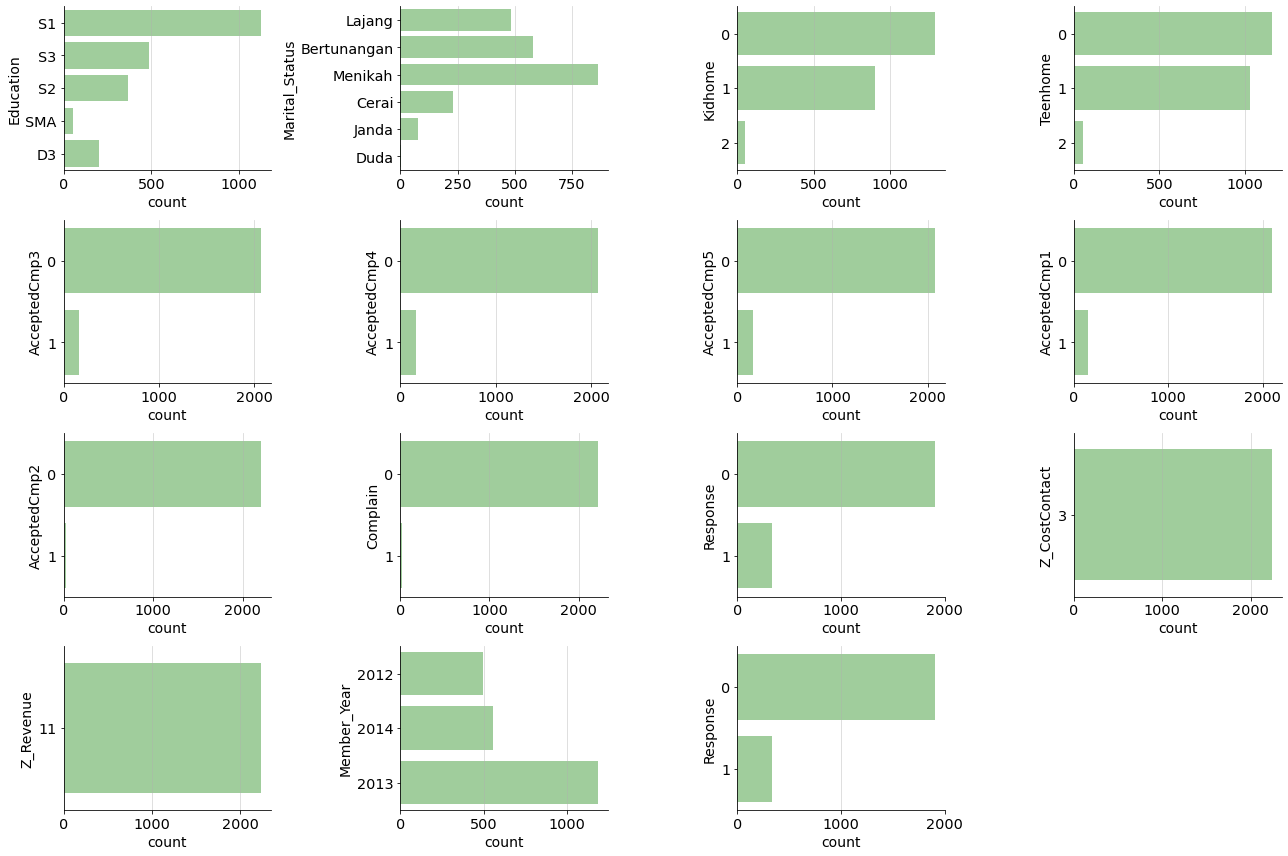

In [ ]:
for i, col in enumerate(categorical):
    plt.subplot(4, 4, i+1)
    sns.countplot(
        y=df[col],
        color=COLORS[0],
        orient='v'
    )
    plt.xlabel("count", fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()

plt.show()

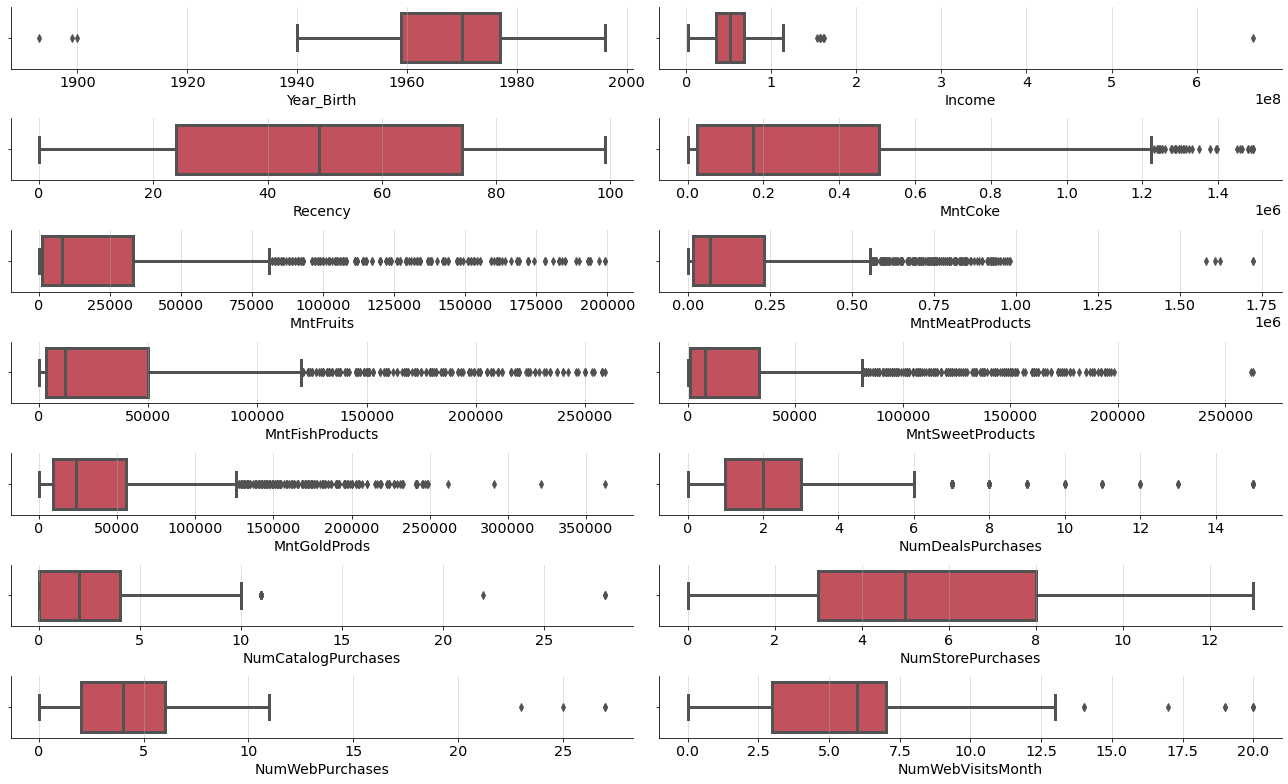

In [ ]:
for i, col in enumerate(numerical):
    plt.subplot(8, 2, i+1)            
    sns.boxplot(
        x=df[col], 
        color=COLORS[1], 
        orient='h'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show() 

In [ ]:
df['Age'] = date.today().year - df['Year_Birth']
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Total_Transactions'] = df['MntCoke'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Campaign_Acc'] = df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

df.drop(columns='Year_Birth', inplace=True)
df.drop(columns='Kidhome', inplace=True)
df.drop(columns='Teenhome', inplace=True)

In [ ]:
over_income = df['Income']>150000000
df[over_income]

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Member_Year,Age,Kids,Total_Transactions,Total_Purchases,Campaign_Acc
164,S3,Menikah,157243000.0,98,20000,2000,1582000,1000,2000,1000,...,0,3,11,0,2014,49,1,1608000,22,0
617,S3,Bertunangan,162397000.0,31,85000,1000,16000,2000,1000,2000,...,0,3,11,0,2013,46,2,107000,1,0
655,S1,Cerai,153924000.0,81,1000,1000,1000,1000,1000,1000,...,0,3,11,0,2014,47,0,6000,0,0
687,S3,Menikah,160803000.0,21,55000,16000,1622000,17000,3000,4000,...,0,3,11,0,2012,40,0,1717000,29,0
1300,S2,Bertunangan,157733000.0,37,39000,1000,9000,2000,0,8000,...,0,3,11,0,2013,51,1,59000,2,0
1653,S1,Bertunangan,157146000.0,13,1000,0,1725000,2000,1000,1000,...,0,3,11,0,2013,45,0,1730000,28,0
2132,S3,Menikah,156924000.0,85,2000,1000,2000,1000,1000,1000,...,0,3,11,0,2013,73,0,8000,0,0
2233,S1,Bertunangan,666666000.0,23,9000,14000,18000,8000,1000,12000,...,0,3,11,0,2013,45,1,62000,7,0


In [ ]:
too_old = df['Age']>100
df[too_old]

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Member_Year,Age,Kids,Total_Transactions,Total_Purchases,Campaign_Acc
192,D3,Cerai,36640000.0,99,15000,6000,8000,7000,4000,25000,...,1,3,11,0,2013,122,1,65000,5,0
239,D3,Lajang,60182000.0,23,8000,0,5000,7000,0,2000,...,0,3,11,0,2014,129,1,22000,3,0
339,S3,Bertunangan,83532000.0,36,755000,144000,562000,104000,64000,224000,...,0,3,11,0,2013,123,0,1853000,14,1


In [ ]:
df.drop(columns='Z_CostContact', inplace=True)
df.drop(columns='Z_Revenue', inplace=True)

df = df.loc[(~over_income)].copy()
df = df.loc[~too_old].reset_index(drop=True).copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   object 
 1   Marital_Status       2229 non-null   object 
 2   Income               2229 non-null   float64
 3   Recency              2229 non-null   int64  
 4   MntCoke              2229 non-null   int64  
 5   MntFruits            2229 non-null   int64  
 6   MntMeatProducts      2229 non-null   int64  
 7   MntFishProducts      2229 non-null   int64  
 8   MntSweetProducts     2229 non-null   int64  
 9   MntGoldProds         2229 non-null   int64  
 10  NumDealsPurchases    2229 non-null   int64  
 11  NumWebPurchases      2229 non-null   int64  
 12  NumCatalogPurchases  2229 non-null   int64  
 13  NumStorePurchases    2229 non-null   int64  
 14  NumWebVisitsMonth    2229 non-null   int64  
 15  AcceptedCmp3         2229 non-null   i

In [ ]:
df_label = df.copy()

label_encoding = {'Education': {'SMA':0,'D3':1,'S1':2, 'S2': 3, 'S3': 4},
                  'Marital_Status': {'Lajang':0, 'Cerai':0, 'Janda':0, 'Duda':0, 'Menikah':1, 'Bertunangan':1},
                  'Member_Year': {'2012':0, '2013':1, '2014':2}}

df_label[['Education', 'Marital_Status', 'Member_Year']] = df_label[['Education', 'Marital_Status', 'Member_Year']].replace(label_encoding)

df_label.sample(5)

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Member_Year,Age,Kids,Total_Transactions,Total_Purchases,Campaign_Acc
1319,4,1,45503000.0,54,97000,4000,44000,6000,1000,18000,...,0,0,0,0,1,47,1,170000,8,0
2170,2,1,26067000.0,49,22000,2000,18000,0,2000,12000,...,0,0,0,0,1,48,1,56000,6,0
202,4,0,40637000.0,72,22000,0,13000,0,0,3000,...,0,0,0,0,1,57,2,38000,4,0
573,2,1,13260000.0,48,9000,4000,17000,10000,2000,7000,...,0,0,0,0,1,52,2,49000,6,0
2160,2,0,69263000.0,14,492000,5000,32000,13000,5000,21000,...,0,0,0,0,2,57,1,568000,17,1


In [ ]:
df_select = df_label[['Recency',	'MntCoke',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	
                'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases', 
                'Total_Purchases', 'NumCatalogPurchases',	'NumStorePurchases', 'Total_Transactions', 
                'NumWebVisitsMonth', 'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',
                'AcceptedCmp2', 'Campaign_Acc', 'Member_Year']].copy()

df_select.head()

,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,Total_Purchases,...,NumStorePurchases,Total_Transactions,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Campaign_Acc,Member_Year
0,58,635000,88000,546000,172000,88000,88000,3,8,22,...,4,1617000,7,0,0,0,0,0,0,0
1,38,11000,1000,6000,2000,1000,6000,2,1,4,...,2,27000,5,0,0,0,0,0,0,2
2,26,426000,49000,127000,111000,21000,42000,1,8,20,...,10,776000,4,0,0,0,0,0,0,1
3,26,11000,4000,20000,10000,3000,5000,2,2,6,...,4,53000,6,0,0,0,0,0,0,2
4,94,173000,43000,118000,46000,27000,15000,5,5,14,...,6,422000,5,0,0,0,0,0,0,2


In [ ]:
Recency = ['Recency','AcceptedCmp3', 'AcceptedCmp4',	'AcceptedCmp5',	
           'AcceptedCmp1', 'AcceptedCmp2','Campaign_Acc', 'Member_Year']
pca1 = PCA(n_components=1)
pca1.fit(df_select[Recency])
df_pca1 = pd.DataFrame(pca1.transform(df_select[Recency]))
df_pca1.rename(columns={0:'Recency'}, inplace=True)

pca1.explained_variance_ratio_

array([0.99855944])

In [ ]:
Frequency = ['NumDealsPurchases',	'NumWebPurchases',
             'NumCatalogPurchases','NumStorePurchases',
             'NumWebVisitsMonth','Total_Purchases']
pca2 = PCA(n_components=1)
pca2.fit(df_select[Frequency])
df_pca2 = pd.DataFrame(pca2.transform(df_select[Frequency]))
df_pca2.rename(columns={0:'Frequency'}, inplace=True)

pca2.explained_variance_ratio_

array([0.80718373])

In [ ]:
Monetary = ['MntCoke',	'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'Total_Transactions']
pca3 = PCA(n_components=1)
pca3.fit(df_select[Monetary])
df_pca3 = pd.DataFrame(pca3.transform(df_select[Monetary]))
df_pca3.rename(columns={0:'Monetary'}, inplace=True)

pca3.explained_variance_ratio_

array([0.9259048])

In [ ]:
df_pca = df_pca1.join(df_pca2)
df_pca = df_pca.join(df_pca3)
df_pca

,Recency,Frequency,Monetary
0,8.894459,10.224120,1.122056e+06
1,-11.106864,-9.782815,-6.708705e+05
2,-23.106195,8.746494,1.931047e+05
3,-23.106860,-7.548171,-6.444721e+05
4,44.893118,1.730282,-2.276807e+05
...,...,...,...
2224,-3.106201,3.702524,8.228772e+05
2225,6.892678,2.504747,-1.338051e+05
2226,41.893002,6.548507,8.221766e+05
2227,-41.106854,10.064480,2.729111e+05


In [ ]:
df_standard = df_pca.copy()
standard = ['Recency', 'Frequency', 'Monetary']

In [ ]:
df_standard[standard] = StandardScaler().fit_transform(df_standard[standard].values.reshape(len(df_standard),3))
df_standard

,Recency,Frequency,Monetary
0,0.307341,1.220083,1.599462
1,-0.383789,-1.167420,-0.956309
2,-0.798417,1.043752,0.275266
3,-0.798440,-0.900752,-0.918679
4,1.551248,0.206481,-0.324553
...,...,...,...
2224,-0.107332,0.441836,1.172991
2225,0.238171,0.298901,-0.190736
2226,1.447582,0.781458,1.171992
2227,-1.420417,1.201032,0.389028


In [ ]:
df_label.to_csv('cleaned_marketing_campaign.csv', index=False)

In [ ]:
df_standard.to_csv('standard_marketing_campaign.csv', index=False)